## Load the Iris Dataset

In [9]:
# Load the built-in iris dataset
data(iris)

# Rename it to 'dataset' for consistency
dataset <- iris

# Take a quick look at the first few rows
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Split the Dataset into Training and Validation

In [12]:
# Load caret package for partitioning
library(caret)

# Create an 80% sample for training
set.seed(123)  # ensures reproducibility
validation_index <- createDataPartition(dataset$Species, p = 0.80, list = FALSE)

# Split the data
validation <- dataset[-validation_index, ]   # 20% held back for validation
dataset <- dataset[validation_index, ]       # 80% for training

# Check dimensions to verify
dim(dataset)      # training data (should be ~120 rows)
dim(validation)   # validation data (should be ~30 rows)


Loading required package: lattice



[1] 120   5

[1] 30  5

## Dimensions of Dataset

In [15]:
# dimensions of dataset
dim(dataset)


[1] 120   5

## Types of Attributes

In [18]:
# list types for each attribute
sapply(dataset, class)


Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [1]:
head(mtcars)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Peek at the Data

In [21]:
# take a peek at the first 5 rows of the data
head(dataset)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


## Visualize Dataset
 Univariate Plots

In [24]:
# split input and output
x <- dataset[,1:4]  # first 4 columns
y <- dataset[,5]    # Species column


## Box and Whisker Plots for numeric attributes:

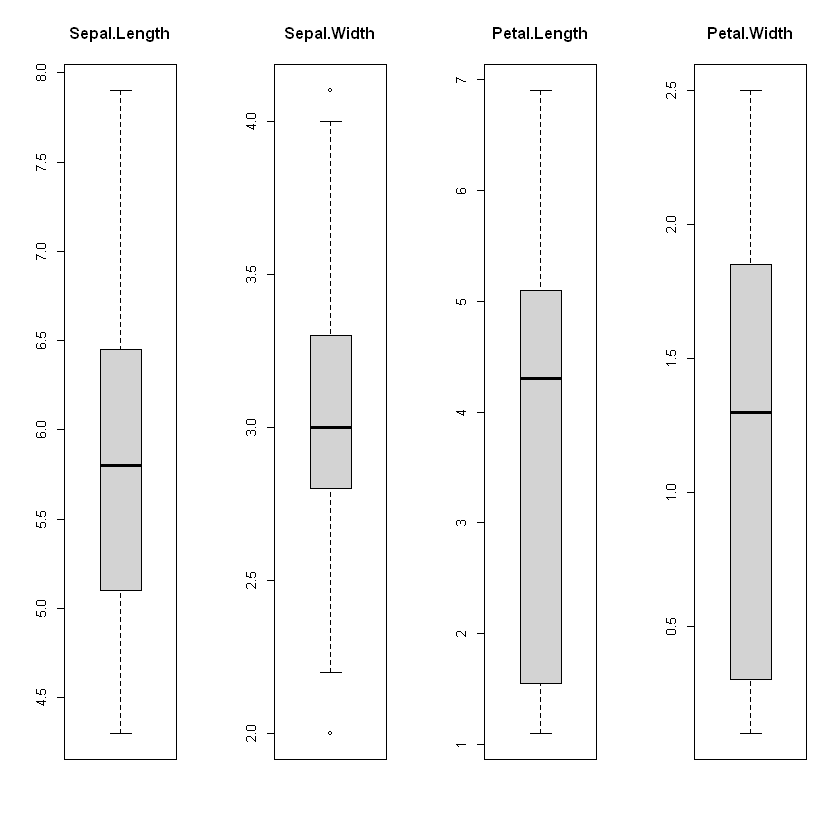

In [27]:
# boxplot for each numeric attribute
par(mfrow=c(1,4))  # arrange 1 row, 4 columns
for(i in 1:4) {
  boxplot(x[,i], main=names(dataset)[i])
}


## Bar plot for the class distribution:

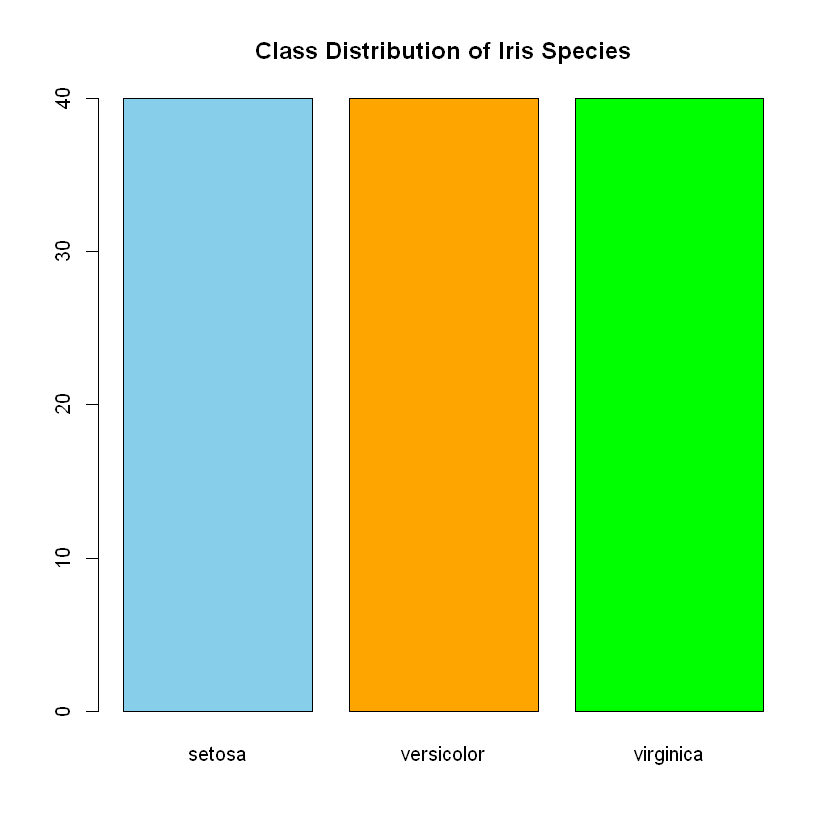

In [30]:
# bar plot for the class variable
plot(y, main="Class Distribution of Iris Species", col=c("skyblue","orange","green"))


## Multivariate Plots

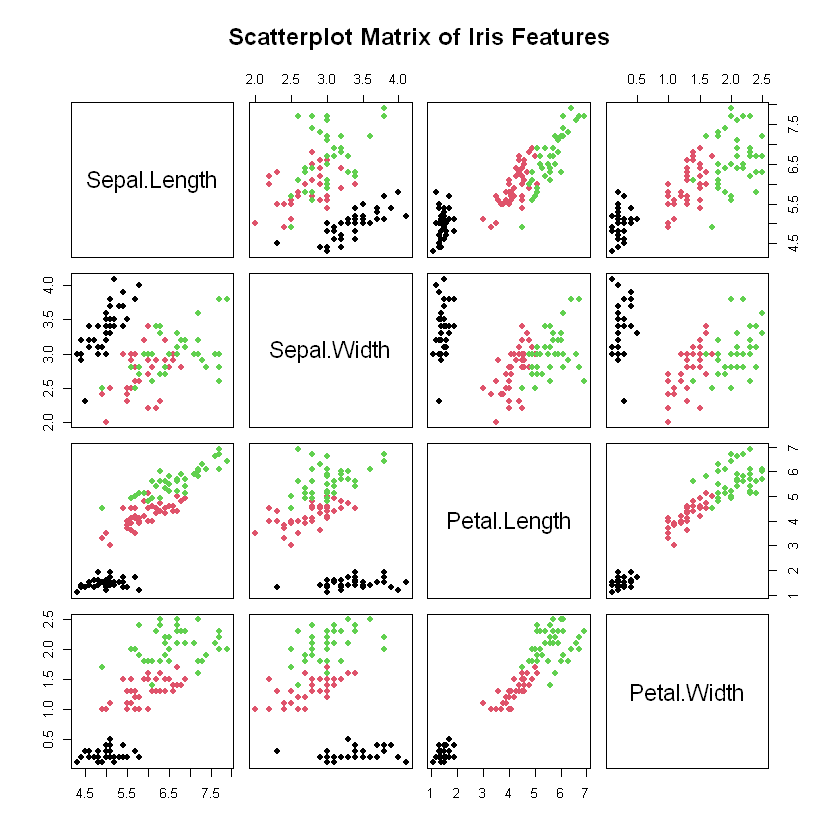

In [35]:
# basic scatterplot matrix colored by species
pairs(x, col=y, pch=19, main="Scatterplot Matrix of Iris Features")


In [39]:
# install GGally package
install.packages("GGally")

# then load it
library(GGally)


Installing package into 'C:/Users/kehin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'patchwork', 'ggstats', 'S7'




package 'patchwork' successfully unpacked and MD5 sums checked
package 'ggstats' successfully unpacked and MD5 sums checked
package 'S7' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kehin\AppData\Local\Temp\RtmpU5pej2\downloaded_packages


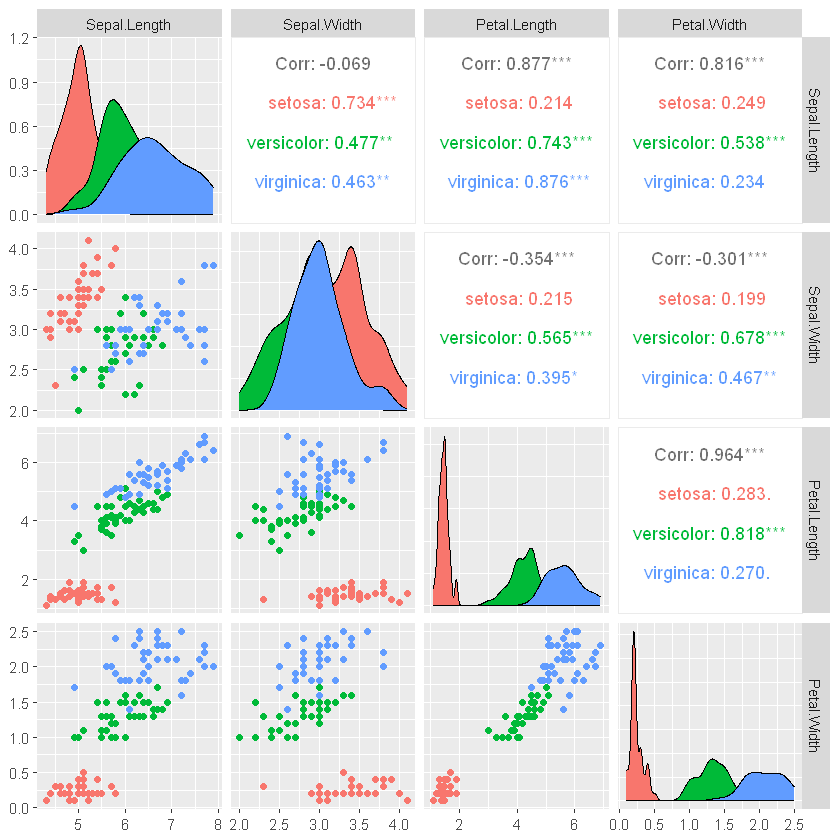

In [43]:
ggpairs(dataset, columns=1:4, aes(color=Species))


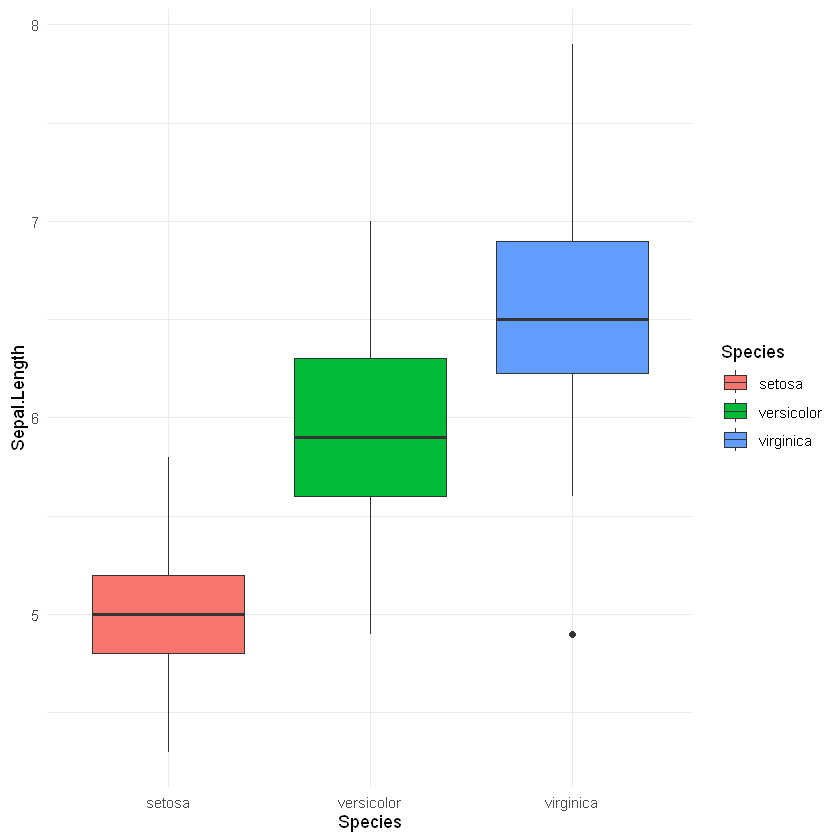

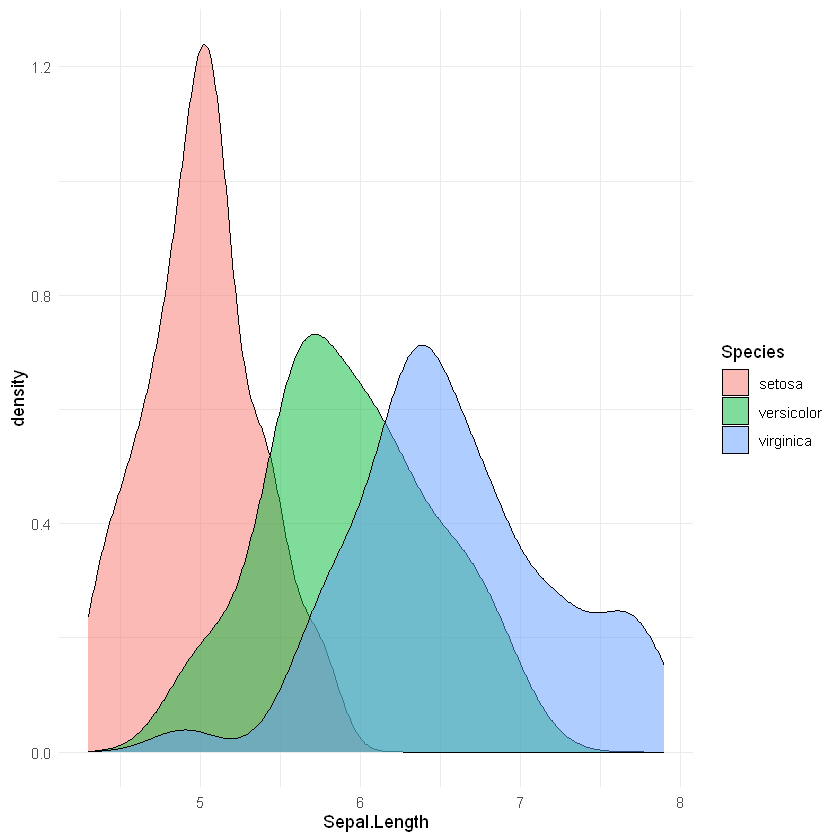

In [53]:
# Boxplots
ggplot(iris, aes(x=Species, y=Sepal.Length, fill=Species)) +
  geom_boxplot() +
  theme_minimal()

# Density plots
ggplot(iris, aes(x=Sepal.Length, fill=Species)) +
  geom_density(alpha=0.5) +
  theme_minimal()


## Box and Whisker Plots for Each Attribute by Class

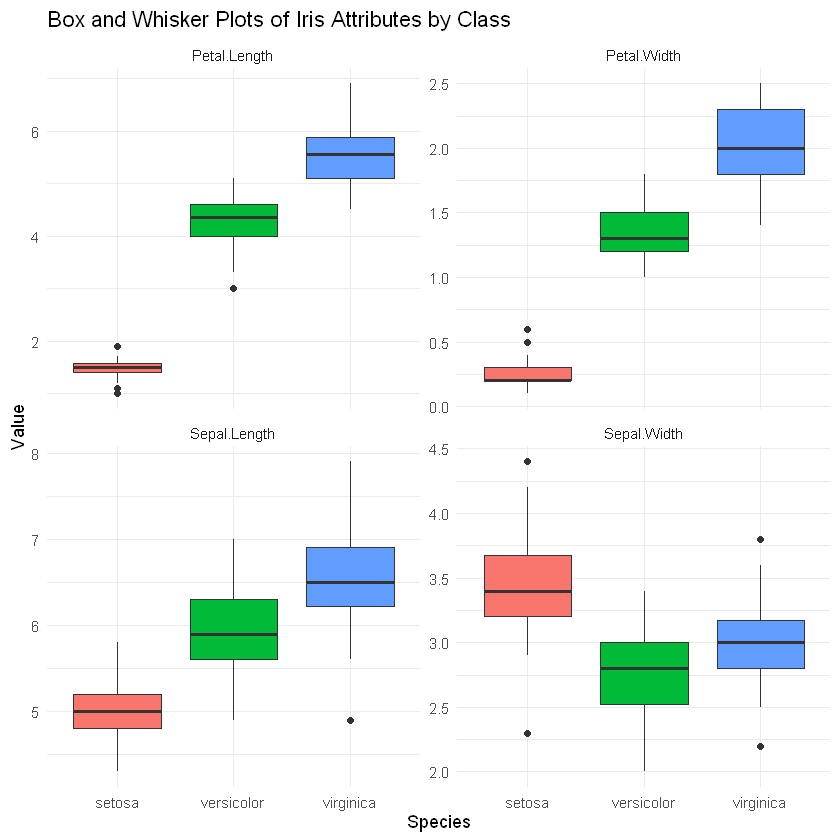

In [61]:
# Boxplots for each attribute broken down by Species
library(tidyr)

# Convert iris data to long format
iris_long <- pivot_longer(iris, cols = 1:4, names_to = "Attribute", values_to = "Value")

# Boxplots
ggplot(iris_long, aes(x = Species, y = Value, fill = Species)) +
  geom_boxplot() +
  facet_wrap(~ Attribute, scales = "free_y") +
  theme_minimal() +
  theme(legend.position = "none") +
  labs(title = "Box and Whisker Plots of Iris Attributes by Class")


## Density Plots for Each Attribute by Class

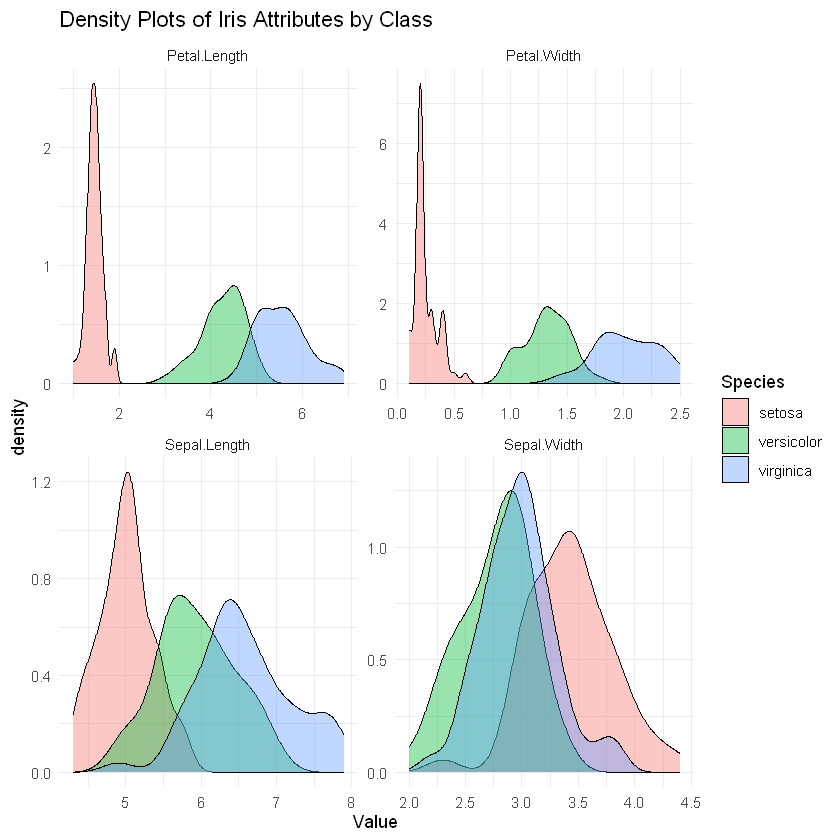

In [64]:
# Density plots for each attribute by class
ggplot(iris_long, aes(x = Value, fill = Species)) +
  geom_density(alpha = 0.4) +
  facet_wrap(~ Attribute, scales = "free") +
  theme_minimal() +
  labs(title = "Density Plots of Iris Attributes by Class")


## Set up the test harness


In [67]:
library(caret)

# Define the control using 10-fold cross validation
control <- trainControl(method = "cv", number = 10)
metric <- "Accuracy"


## Build models

In [72]:
install.packages("kernlab")
library(kernlab)
fit.svm <- train(Species ~ ., data = dataset, method = "svmRadial", metric = metric, trControl = control)


Installing package into 'C:/Users/kehin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kehin\AppData\Local\Temp\RtmpU5pej2\downloaded_packages



Attaching package: 'kernlab'


The following object is masked from 'package:ggplot2':

    alpha




In [74]:
# Define cross-validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [78]:
install.packages("randomForest")
install.packages("kernlab")  # if you haven't installed it yet


Installing package into 'C:/Users/kehin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kehin\AppData\Local\Temp\RtmpU5pej2\downloaded_packages


Warning message:
"package 'kernlab' is in use and will not be installed"


In [80]:
library(randomForest)
library(kernlab)
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine





Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9333333 0.9500000 1.0000000 0.9800000       1    1    0
cart 0.8666667 0.8833333 0.9333333 0.9400000       1    1    0
knn  0.8666667 0.9333333 1.0000000 0.9666667       1    1    0
svm  0.8666667 0.9333333 1.0000000 0.9666667       1    1    0
rf   0.8666667 0.9333333 0.9666667 0.9600000       1    1    0

Kappa 
     Min. 1st Qu. Median Mean 3rd Qu. Max. NA's
lda   0.9   0.925   1.00 0.97       1    1    0
cart  0.8   0.825   0.90 0.91       1    1    0
knn   0.8   0.900   1.00 0.95       1    1    0
svm   0.8   0.900   1.00 0.95       1    1    0
rf    0.8   0.900   0.95 0.94       1    1    0


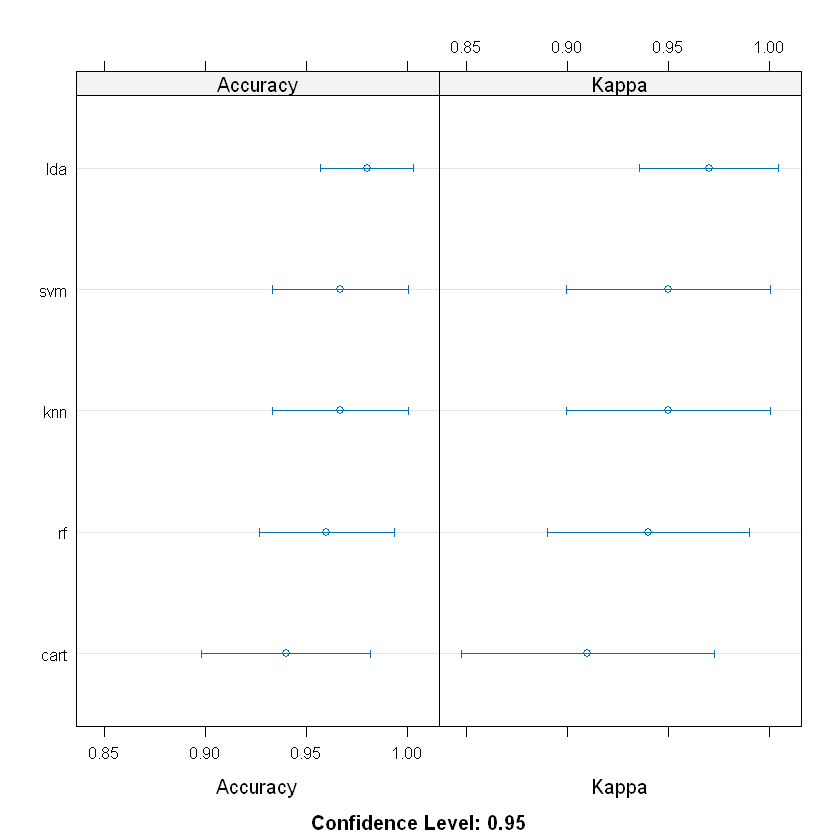

In [82]:
# Build Models

# a) Linear algorithm
fit.lda <- train(Species ~ ., data=dataset, method="lda", metric=metric, trControl=control)

# b) Nonlinear algorithms
fit.cart <- train(Species ~ ., data=dataset, method="rpart", metric=metric, trControl=control)
fit.knn  <- train(Species ~ ., data=dataset, method="knn", metric=metric, trControl=control)

# c) Advanced algorithms
# Ensure kernlab is installed for SVM
if(!require(kernlab)) install.packages("kernlab")
library(kernlab)
fit.svm  <- train(Species ~ ., data=dataset, method="svmRadial", metric=metric, trControl=control)

fit.rf   <- train(Species ~ ., data=dataset, method="rf", metric=metric, trControl=control)

# Select Best Model

# Summarize results
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)

# Plot accuracy comparison
dotplot(results)

## Train the LDA Model

In [85]:
fit.lda <- train(Species ~ ., data=dataset, method="lda", metric=metric, trControl=control)
print(fit.lda)


Linear Discriminant Analysis 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy  Kappa
  0.98      0.97 



## Validate the Model

In [88]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P